In [3]:
# Instalação e importação de Bibliotecas
# pip install tensorflow keras scikit-learn optuna matplotlib pandas numpy optuna-dashboard

# Importações para Deep Learning com TensorFlow e Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SpatialDropout1D, SimpleRNN, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Importações para machine learning tradicional com Scikit-learn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# Utilitários adicionais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Hyperparameter optimization
import optuna


c:\Users\ana_v\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("C:/Users/ana_v/OneDrive/Área de Trabalho/GitHub/breastcancer-classification/GEO Repository/GSE25066.csv", low_memory=False)

# Contagem de ocorrências de cada rótulo
label_counts = df['type'].value_counts()

df_pca = df
df_pca = df_pca.drop(columns=["sample"])
df_pca = df_pca.drop(columns=["type"])

table=df_pca.T 
sd=np.std(table)
mean=np.mean(table)
numerator=table-mean 
z_score=numerator/sd
df_pca_norm=z_score.T 
df_pca_norm

# Carregar os dados
df = pd.read_csv("C:/Users/ana_v/OneDrive/Documentos/Mestrado/MachineLearning/GSE25066.csv", low_memory=False)

# Obtém os valores únicos na coluna 'Type'
unique_types = df['type'].unique()

# Cria um dicionário mapeando cada tipo único para um número
type_to_numeric = {type_name: index for index, type_name in enumerate(unique_types)}

# Aplica a substituição usando o método map
df['type'] = df['type'].map(type_to_numeric)

# Armazena a coluna 'Type' para adicioná-la de volta posteriormente
type_column = df['type']

# Prepara o DataFrame para normalização (remover colunas desnecessárias)
df_num = df.drop(columns=["sample", "type"])

# Normalizar os dados
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(df_num)

# Aplicação do PCA
pca = PCA(n_components=0.8)  
pca.fit(dados_normalizados)
dados_pca = pca.transform(dados_normalizados)

c:\Users\ana_v\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [3]:
# Divisão de treino e teste
X_train, X_test, y_train, y_test = train_test_split(dados_pca, df['type'], test_size=0.2, random_state=42)

# Função objetivo para otimização do SVM
def objective_svm(trial):
    svc_c = trial.suggest_loguniform('svc_c', 1e-5, 1e2)
    svc_kernel = trial.suggest_categorical('svc_kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    
    model_svm = SVC(C=svc_c, kernel=svc_kernel, random_state=42)
    score = cross_val_score(model_svm, X_train, y_train, cv=10, scoring='accuracy').mean()
    return score

# Função objetivo para otimização do Random  
def objective_rf(trial):
    rf_n_estimators = trial.suggest_int('rf_n_estimators', 50, 200)
    rf_max_depth = trial.suggest_int('rf_max_depth', 10, 50)
    rf_min_samples_split = trial.suggest_int('rf_min_samples_split', 2, 20)
    
    model_rf = RandomForestClassifier(n_estimators=rf_n_estimators, max_depth=rf_max_depth,
                                      min_samples_split=rf_min_samples_split, random_state=42)
    score = cross_val_score(model_rf, X_train, y_train, cv=10, scoring='accuracy').mean()
    return score

# Função objetivo para otimização da Regressão Logística
def objective_lr(trial):
    lr_c = trial.suggest_loguniform('lr_c', 1e-5, 1e2)
    lr_solver = trial.suggest_categorical('lr_solver', ['newton-cg', 'lbfgs', 'liblinear', 'saga'])
    
    model_lr = LogisticRegression(C=lr_c, solver=lr_solver, max_iter=10000, random_state=42)
    score = cross_val_score(model_lr, X_train, y_train, cv=10, scoring='accuracy').mean()
    return score

# Estudo e otimização com Optuna para SVM
study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(objective_svm, n_trials=10)
best_params_svm = study_svm.best_params
print("Melhores parâmetros para SVM:", best_params_svm)

# Estudo e otimização com Optuna para Random Forest
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=10)
best_params_rf = study_rf.best_params
print("Melhores parâmetros para Random Forest:", best_params_rf)

# Estudo e otimização com Optuna para Regressão Logística
study_lr = optuna.create_study(direction='maximize')
study_lr.optimize(objective_lr, n_trials=10)
best_params_lr = study_lr.best_params
print("Melhores parâmetros para Regressão Logística:", best_params_lr)

[I 2024-07-31 12:59:44,894] A new study created in memory with name: no-name-dbb07b9f-d58f-4d9f-bfe6-d64f1238a4cf
C:\Users\ana_v\AppData\Local\Temp\ipykernel_26376\2969343382.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  svc_c = trial.suggest_loguniform('svc_c', 1e-5, 1e2)
[I 2024-07-31 12:59:45,257] Trial 0 finished with value: 0.726890243902439 and parameters: {'svc_c': 36.850087243109165, 'svc_kernel': 'poly'}. Best is trial 0 with value: 0.726890243902439.
C:\Users\ana_v\AppData\Local\Temp\ipykernel_26376\2969343382.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  svc_c = trial.suggest_loguniform('svc_c', 1e-5, 1e2)
[I 2024-07-31 12:59:45,507] Trial 1 finis

Melhores parâmetros para SVM: {'svc_c': 3.643821331651176e-05, 'svc_kernel': 'linear'}


[I 2024-07-31 12:59:56,048] Trial 0 finished with value: 0.6353658536585366 and parameters: {'rf_n_estimators': 125, 'rf_max_depth': 22, 'rf_min_samples_split': 12}. Best is trial 0 with value: 0.6353658536585366.
[I 2024-07-31 13:00:04,281] Trial 1 finished with value: 0.6329268292682927 and parameters: {'rf_n_estimators': 162, 'rf_max_depth': 24, 'rf_min_samples_split': 17}. Best is trial 0 with value: 0.6353658536585366.
[I 2024-07-31 13:00:14,012] Trial 2 finished with value: 0.6329268292682928 and parameters: {'rf_n_estimators': 181, 'rf_max_depth': 46, 'rf_min_samples_split': 2}. Best is trial 0 with value: 0.6353658536585366.
[I 2024-07-31 13:00:16,736] Trial 3 finished with value: 0.6183536585365854 and parameters: {'rf_n_estimators': 54, 'rf_max_depth': 16, 'rf_min_samples_split': 4}. Best is trial 0 with value: 0.6353658536585366.
[I 2024-07-31 13:00:21,867] Trial 4 finished with value: 0.640060975609756 and parameters: {'rf_n_estimators': 109, 'rf_max_depth': 38, 'rf_min_sam

Melhores parâmetros para Random Forest: {'rf_n_estimators': 99, 'rf_max_depth': 30, 'rf_min_samples_split': 19}


[I 2024-07-31 13:00:53,711] Trial 0 finished with value: 0.7957317073170731 and parameters: {'lr_c': 0.0010123454678632607, 'lr_solver': 'saga'}. Best is trial 0 with value: 0.7957317073170731.
C:\Users\ana_v\AppData\Local\Temp\ipykernel_26376\2969343382.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr_c = trial.suggest_loguniform('lr_c', 1e-5, 1e2)
[I 2024-07-31 13:01:06,840] Trial 1 finished with value: 0.8006097560975609 and parameters: {'lr_c': 8.05524795376795e-05, 'lr_solver': 'saga'}. Best is trial 1 with value: 0.8006097560975609.
C:\Users\ana_v\AppData\Local\Temp\ipykernel_26376\2969343382.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr_c = trial

Melhores parâmetros para Regressão Logística: {'lr_c': 8.05524795376795e-05, 'lr_solver': 'saga'}


SVM - Acurácia (Treinamento): 0.9039408866995073
SVM - Acurácia (Teste): 0.7647058823529411
Acurácia média na validação cruzada: 0.7760975609756098

Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.73      0.93      0.82        29
           1       0.71      0.56      0.62         9
           2       0.83      0.97      0.90        36
           3       0.64      0.56      0.60        16
           4       1.00      0.17      0.29        12

    accuracy                           0.76       102
   macro avg       0.78      0.64      0.65       102
weighted avg       0.78      0.76      0.73       102



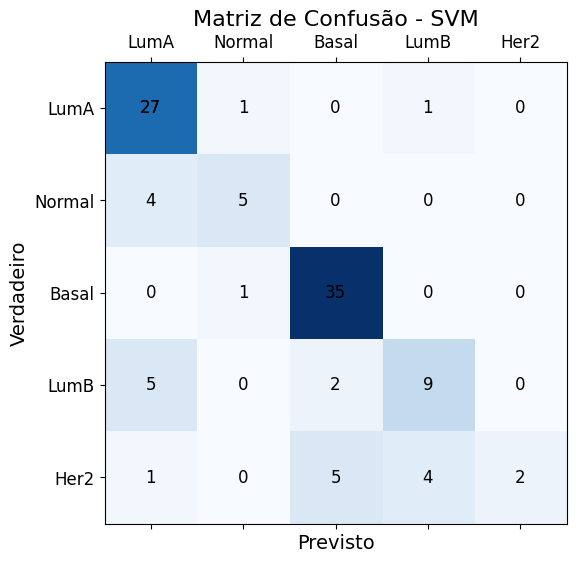

In [4]:
# Treinar e avaliar o modelo SVM com os melhores parâmetros
best_model_svm = SVC(C=best_params_svm['svc_c'], kernel=best_params_svm['svc_kernel'], random_state=42)
best_model_svm.fit(X_train, y_train)
svm_predictions_train = best_model_svm.predict(X_train)
svm_predictions_test = best_model_svm.predict(X_test)

# Avaliação SVM
svm_accuracy_train = accuracy_score(y_train, svm_predictions_train)
svm_accuracy_test = accuracy_score(y_test, svm_predictions_test)
svm_report = classification_report(y_test, svm_predictions_test, zero_division=1)

# Resultados
print(f'SVM - Acurácia (Treinamento): {svm_accuracy_train}')
print(f'SVM - Acurácia (Teste): {svm_accuracy_test}')
print(f'Acurácia média na validação cruzada: {cross_val_score(best_model_svm, X_train, y_train, cv=10).mean()}')
print(f'\nClassification Report (SVM):\n{svm_report}')

# Matriz de Confusão SVM
confusion_svm = confusion_matrix(y_test, svm_predictions_test)
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(confusion_svm, cmap='Blues')
def add_text(x, y, val):
    plt.text(x, y, str(val), va='center', ha='center', color='black', fontsize=12)
add_text_vectorized = np.vectorize(add_text)
add_text_vectorized(*np.meshgrid(range(len(unique_types)), range(len(unique_types))), confusion_svm)
plt.title('Matriz de Confusão - SVM', fontsize=16)
plt.xlabel('Previsto', fontsize=14)
plt.ylabel('Verdadeiro', fontsize=14)
plt.xticks(range(len(unique_types)), unique_types, fontsize=12)
plt.yticks(range(len(unique_types)), unique_types, fontsize=12)
plt.show()

Random Forest - Acurácia (Treinamento): 0.9408866995073891
Random Forest - Acurácia (Teste): 0.6274509803921569
Acurácia média na validação cruzada: 0.6477439024390244

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.61      0.93      0.74        29
           1       1.00      0.00      0.00         9
           2       0.62      0.97      0.76        36
           3       1.00      0.12      0.22        16
           4       1.00      0.00      0.00        12

    accuracy                           0.63       102
   macro avg       0.85      0.41      0.34       102
weighted avg       0.76      0.63      0.51       102



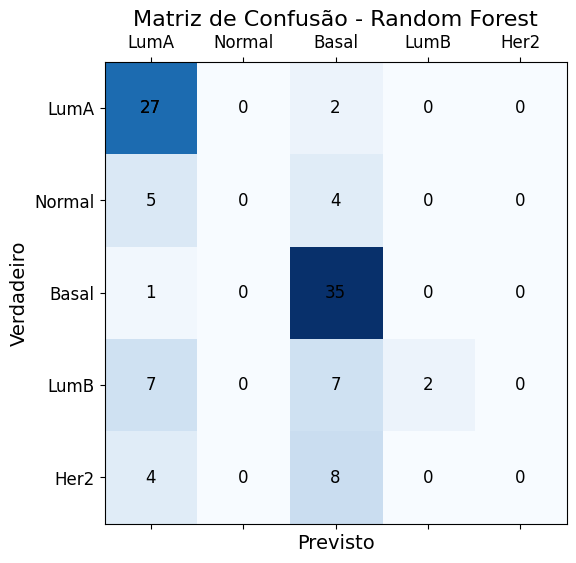

In [5]:
# Treinar e avaliar o modelo Random Forest com os melhores parâmetros
best_model_rf = RandomForestClassifier(
    n_estimators=best_params_rf['rf_n_estimators'],
    max_depth=best_params_rf['rf_max_depth'],
    min_samples_split=best_params_rf['rf_min_samples_split'],
    random_state=42
)
best_model_rf.fit(X_train, y_train)
rf_predictions_train = best_model_rf.predict(X_train)
rf_predictions_test = best_model_rf.predict(X_test)

# Avaliação Random Forest
rf_accuracy_train = accuracy_score(y_train, rf_predictions_train)
rf_accuracy_test = accuracy_score(y_test, rf_predictions_test)
rf_report = classification_report(y_test, rf_predictions_test, zero_division=1)

print(f'Random Forest - Acurácia (Treinamento): {rf_accuracy_train}')
print(f'Random Forest - Acurácia (Teste): {rf_accuracy_test}')
print(f'Acurácia média na validação cruzada: {cross_val_score(best_model_rf, X_train, y_train, cv=10).mean()}')
print(f'\nClassification Report (Random Forest):\n{rf_report}')

# Matriz de Confusão Random Forest
confusion_rf = confusion_matrix(y_test, rf_predictions_test)
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(confusion_rf, cmap='Blues')
add_text_vectorized(*np.meshgrid(range(len(unique_types)), range(len(unique_types))), confusion_rf)
plt.title('Matriz de Confusão - Random Forest', fontsize=16)
plt.xlabel('Previsto', fontsize=14)
plt.ylabel('Verdadeiro', fontsize=14)
plt.xticks(range(len(unique_types)), unique_types, fontsize=12)
plt.yticks(range(len(unique_types)), unique_types, fontsize=12)
plt.show()

Regressão Logística - Acurácia (Treinamento): 0.9285714285714286
Regressão Logística - Acurácia (Teste): 0.7941176470588235
Acurácia média na validação cruzada: 0.8006097560975609

Classification Report (Regressão Logística):
              precision    recall  f1-score   support

           0       0.74      0.90      0.81        29
           1       0.67      0.67      0.67         9
           2       0.90      0.97      0.93        36
           3       0.67      0.62      0.65        16
           4       1.00      0.33      0.50        12

    accuracy                           0.79       102
   macro avg       0.79      0.70      0.71       102
weighted avg       0.81      0.79      0.78       102



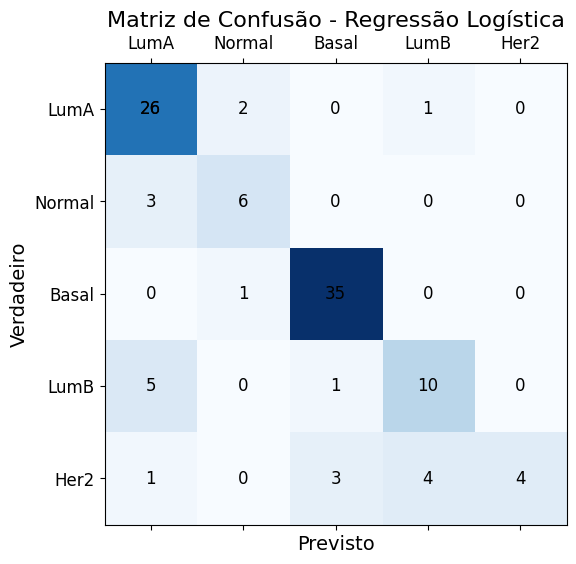

In [6]:
# Treinar e avaliar o modelo Regressão Logística com os melhores parâmetros
best_model_lr = LogisticRegression(
    C=best_params_lr['lr_c'],
    solver=best_params_lr['lr_solver'],
    max_iter=10000,
    random_state=42
)
best_model_lr.fit(X_train, y_train)
lr_predictions_train = best_model_lr.predict(X_train)
lr_predictions_test = best_model_lr.predict(X_test)

# Avaliação Regressão Logística
lr_accuracy_train = accuracy_score(y_train, lr_predictions_train)
lr_accuracy_test = accuracy_score(y_test, lr_predictions_test)
lr_report = classification_report(y_test, lr_predictions_test)
print(f'Regressão Logística - Acurácia (Treinamento): {lr_accuracy_train}')
print(f'Regressão Logística - Acurácia (Teste): {lr_accuracy_test}')
print(f'Acurácia média na validação cruzada: {cross_val_score(best_model_lr, X_train, y_train, cv=10).mean()}')
print(f'\nClassification Report (Regressão Logística):\n{lr_report}')

# Matriz de Confusão Regressão Logística
confusion_lr = confusion_matrix(y_test, lr_predictions_test)
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(confusion_lr, cmap='Blues')
add_text_vectorized(*np.meshgrid(range(len(unique_types)), range(len(unique_types))), confusion_lr)
plt.title('Matriz de Confusão - Regressão Logística', fontsize=16)
plt.xlabel('Previsto', fontsize=14)
plt.ylabel('Verdadeiro', fontsize=14)
plt.xticks(range(len(unique_types)), unique_types, fontsize=12)
plt.yticks(range(len(unique_types)), unique_types, fontsize=12)
plt.show()

In [11]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SpatialDropout1D, SimpleRNN, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import optuna
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
import numpy as np


In [13]:
# Função objetivo para otimização do MLP
def objective_mlp(trial):
    # Hiperparâmetros para MLP
    hidden_layer_sizes = trial.suggest_categorical('hidden_layer_sizes', [(50,), (100,), (100, 50), (50, 25)])
    activation = trial.suggest_categorical('activation', ['relu', 'tanh', 'logistic'])
    solver = trial.suggest_categorical('solver', ['adam', 'sgd'])
    alpha = trial.suggest_loguniform('alpha', 1e-5, 1e-1)
    learning_rate_init = trial.suggest_loguniform('learning_rate_init', 1e-4, 1e-1)
    
    # Criar e treinar o modelo
    model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation,
                          solver=solver, alpha=alpha, learning_rate_init=learning_rate_init,
                          max_iter=500, random_state=42)
    
    # Validação cruzada
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    
    return score

# Estudar otimização com Optuna para MLP
study_mlp = optuna.create_study(direction='maximize')
study_mlp.optimize(objective_mlp, n_trials=10)

# Melhores parâmetros
best_params_mlp = study_mlp.best_params
print("Melhores parâmetros para MLP:", best_params_mlp)

# Treinamento e avaliação do MLP com melhores parâmetros
best_mlp_model = MLPClassifier(hidden_layer_sizes=best_params_mlp['hidden_layer_sizes'],
                               activation=best_params_mlp['activation'],
                               solver=best_params_mlp['solver'],
                               alpha=best_params_mlp['alpha'],
                               learning_rate_init=best_params_mlp['learning_rate_init'],
                               max_iter=500, random_state=42)
best_mlp_model.fit(X_train, y_train)
mlp_predictions_train = best_mlp_model.predict(X_train)
mlp_predictions_test = best_mlp_model.predict(X_test)

[I 2024-07-31 13:12:58,768] A new study created in memory with name: no-name-3160a12b-8e41-4104-a8cc-1c59a75d19ab
C:\Users\ana_v\AppData\Local\Temp\ipykernel_26376\1031309146.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e-1)
C:\Users\ana_v\AppData\Local\Temp\ipykernel_26376\1031309146.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform('learning_rate_init', 1e-4, 1e-1)
[I 2024-07-31 13:13:06,321] Trial 0 finished with value: 0.711743450767841 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.00010933790597717237, 'lear

Melhores parâmetros para MLP: {'hidden_layer_sizes': (50,), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.0012899066942717063, 'learning_rate_init': 0.001855870599442118}
Acurácia no treino: 1.0
Acurácia no teste: 0.7941176470588235
Relatório de classificação no teste:
               precision    recall  f1-score   support

           0       0.76      0.86      0.81        29
           1       0.67      0.67      0.67         9
           2       0.92      0.97      0.95        36
           3       0.65      0.69      0.67        16
           4       0.80      0.33      0.47        12

    accuracy                           0.79       102
   macro avg       0.76      0.70      0.71       102
weighted avg       0.79      0.79      0.78       102

Matriz de confusão no teste:
 [[25  2  0  2  0]
 [ 2  6  0  0  1]
 [ 0  1 35  0  0]
 [ 5  0  0 11  0]
 [ 1  0  3  4  4]]


c:\Users\ana_v\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [14]:
# Avaliação para MLP
print("\nResultados do MLP:")
print("Matriz de Confusão:\n", confusion_matrix(y_test, mlp_predictions_test))
print("Acurácia (Treinamento):", accuracy_score(y_train, mlp_predictions_train))
print("Acurácia (Teste):", accuracy_score(y_test, mlp_predictions_test))

# Acurácia média na validação cruzada
cv_mean_score = cross_val_score(best_mlp_model, X_train, y_train, cv=10, scoring='accuracy').mean()
print(f'Acurácia média na validação cruzada (MLP): {cv_mean_score:.4f}')

# Classification Report
mlp_report = classification_report(y_test, mlp_predictions_test, zero_division=1, target_names=[str(cls) for cls in unique_types])
print(f'\nClassification Report (MLP):\n{mlp_report}')


Resultados do MLP:
Matriz de Confusão:
 [[25  2  0  2  0]
 [ 2  6  0  0  1]
 [ 0  1 35  0  0]
 [ 5  0  0 11  0]
 [ 1  0  3  4  4]]
Acurácia (Treinamento): 1.0
Acurácia (Teste): 0.7941176470588235
Precisão (Weighted): 0.7949071851275457
Recall (Weighted): 0.7941176470588235
F1 Score (Weighted): 0.7819105521416047


c:\Users\ana_v\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ana_v\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ana_v\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ana_v\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the opti

Acurácia média na validação cruzada (MLP): 0.7760

Classification Report (MLP):
              precision    recall  f1-score   support

        LumA       0.76      0.86      0.81        29
      Normal       0.67      0.67      0.67         9
       Basal       0.92      0.97      0.95        36
        LumB       0.65      0.69      0.67        16
        Her2       0.80      0.33      0.47        12

    accuracy                           0.79       102
   macro avg       0.76      0.70      0.71       102
weighted avg       0.79      0.79      0.78       102



c:\Users\ana_v\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [20]:
import optuna
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
import numpy as np

# Definir número de classes
num_classes = len(unique_types)  # Certifique-se de que unique_types esteja definido corretamente

# Função para criar o modelo CNN
def create_cnn_model(filters=32, kernel_size=3, pool_size=2, dense_units=64, dropout_rate=0.5):
    model = Sequential([
        Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(pool_size=pool_size),
        Conv1D(filters=filters * 2, kernel_size=kernel_size, activation='relu'),
        MaxPooling1D(pool_size=pool_size),
        Flatten(),
        Dense(dense_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Função objetivo para otimização do CNN
def objective_cnn(trial):
    # Hiperparâmetros para CNN
    filters = trial.suggest_int('filters', 16, 64)
    kernel_size = trial.suggest_int('kernel_size', 2, 5)
    pool_size = trial.suggest_int('pool_size', 2, 4)
    dense_units = trial.suggest_int('dense_units', 32, 128)
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.2, 0.5)

    # Criação do modelo
    model = create_cnn_model(filters=filters,
                             kernel_size=kernel_size,
                             pool_size=pool_size,
                             dense_units=dense_units,
                             dropout_rate=dropout_rate)

    # Validação cruzada
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = []
    
    for train_index, val_index in kf.split(X_train):
        X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
        y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]

        model.fit(X_fold_train, y_fold_train, epochs=10, batch_size=32, verbose=0)
        val_loss, val_accuracy = model.evaluate(X_fold_val, y_fold_val, verbose=0)
        cv_scores.append(val_accuracy)
    
    # Média da acurácia de validação cruzada
    mean_cv_accuracy = np.mean(cv_scores)

    return mean_cv_accuracy

# Estudar otimização com Optuna para CNN
study_cnn = optuna.create_study(direction='maximize')
study_cnn.optimize(objective_cnn, n_trials=10)

# Melhores parâmetros
best_params_cnn = study_cnn.best_params
print("Melhores parâmetros para CNN:", best_params_cnn)

# Treinamento e avaliação do CNN com melhores parâmetros
best_cnn_model = create_cnn_model(filters=best_params_cnn['filters'],
                                  kernel_size=best_params_cnn['kernel_size'],
                                  pool_size=best_params_cnn['pool_size'],
                                  dense_units=best_params_cnn['dense_units'],
                                  dropout_rate=best_params_cnn['dropout_rate'])

# Treinamento do modelo
history = best_cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Avaliação da CNN no conjunto de teste
cnn_loss, cnn_accuracy = best_cnn_model.evaluate(X_test, y_test)

# Predições da CNN no conjunto de teste
cnn_predictions = best_cnn_model.predict(X_test)
cnn_predictions_classes = np.argmax(cnn_predictions, axis=1)

# Classification report da CNN
cnn_report = classification_report(y_test, cnn_predictions_classes, target_names=[str(cls) for cls in unique_types], zero_division=1, digits=2)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, cnn_predictions_classes)

# Acurácia de treinamento
train_accuracy = history.history['accuracy'][-1]

# Acurácia da validação cruzada (a média das acurácias obtidas durante a otimização)
cv_mean_accuracy = study_cnn.best_value


[I 2024-07-31 14:54:40,306] A new study created in memory with name: no-name-a74adc4e-d73a-49ea-8d43-272d639573c8


C:\Users\ana_v\AppData\Local\Temp\ipykernel_26376\1330266180.py:36: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.2, 0.5)
c:\Users\ana_v\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
[I 2024-07-31 14:54:46,591] Trial 0 finished with value: 0.8208672046661377 and parameters: {'filters': 31, 'kernel_size': 3, 'pool_size': 4, 'dense_units': 82, 'dropout_rate': 0.46485077409232867}. Best is trial 0 with value: 0.8208672046661377.
[I 2024-07-31 14:54:52,449] Trial 1 finished with value

Melhores parâmetros para CNN: {'filters': 31, 'kernel_size': 3, 'pool_size': 2, 'dense_units': 128, 'dropout_rate': 0.4204627847477319}
Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.2936 - loss: 3.6851 - val_accuracy: 0.3529 - val_loss: 1.5982
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3878 - loss: 1.4766 - val_accuracy: 0.4510 - val_loss: 1.4570
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4823 - loss: 1.3427 - val_accuracy: 0.4510 - val_loss: 1.4167
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5149 - loss: 1.1722 - val_accuracy: 0.5098 - val_loss: 1.3248
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7176 - loss: 0.9228 - val_accuracy: 0.5196 - val_loss: 1.1984
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6892 - loss: 0.8138 - val_accuracy: 0.5000 - val_loss: 1.1690
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7868 - loss: 0.6428 - val_accuracy: 0

In [21]:
# Exibindo resultados da CNN
print(f'\nCNN - Acurácia (Treinamento): {train_accuracy:.4f}')
print(f'CNN - Acurácia (Teste): {cnn_accuracy:.4f}')
print(f'Acurácia média na validação cruzada (CNN): {cv_mean_accuracy:.4f}')
print(f'\nMatriz de Confusão (CNN):\n{conf_matrix}')
print(f'\nClassification Report (CNN):\n{cnn_report}')


CNN - Acurácia (Treinamento): 0.9360
CNN - Acurácia (Teste): 0.6373
Acurácia média na validação cruzada (CNN): 0.9073

Matriz de Confusão (CNN):
[[22  1  5  1  0]
 [ 2  3  2  0  2]
 [ 4  1 31  0  0]
 [ 6  0  4  6  0]
 [ 1  0  6  2  3]]

Classification Report (CNN):
              precision    recall  f1-score   support

        LumA       0.63      0.76      0.69        29
      Normal       0.60      0.33      0.43         9
       Basal       0.65      0.86      0.74        36
        LumB       0.67      0.38      0.48        16
        Her2       0.60      0.25      0.35        12

    accuracy                           0.64       102
   macro avg       0.63      0.52      0.54       102
weighted avg       0.63      0.64      0.61       102

